# Problem 1

In [1]:
library(TSA)


Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar



In [2]:
data(robot)

In [3]:
model1=arima(robot,order=c(1,0,0))
res1=rstandard(model1)
model1


Call:
arima(x = robot, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.3074     0.0015
s.e.  0.0528     0.0002

sigma^2 estimated as 6.482e-06:  log likelihood = 1475.54,  aic = -2947.08

In [4]:
model2=arima(robot,order=c(0,1,1))
res2=rstandard(model2)
model2


Call:
arima(x = robot, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.8713
s.e.   0.0389

sigma^2 estimated as 6.069e-06:  log likelihood = 1480.95,  aic = -2959.9

### The log likelihood and AIC values are just a little better in IMA(1,1) model

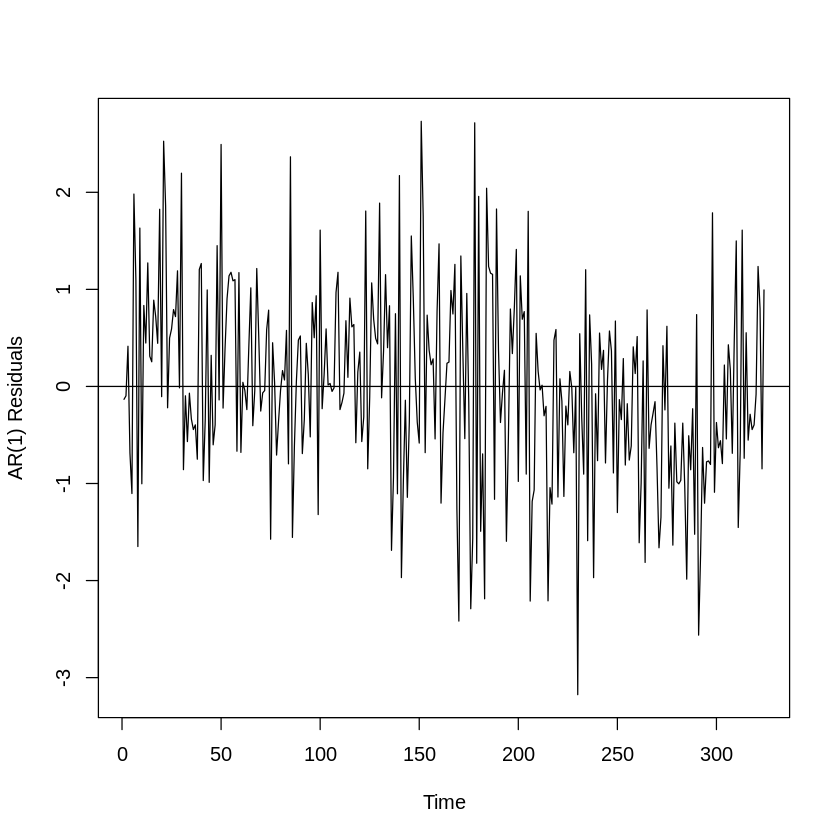

In [5]:
plot(res1,ylab='AR(1) Residuals')
abline(h=0)

### More positive residuals in the first half of the series and more negative in the last half of the series - AR(1) model.

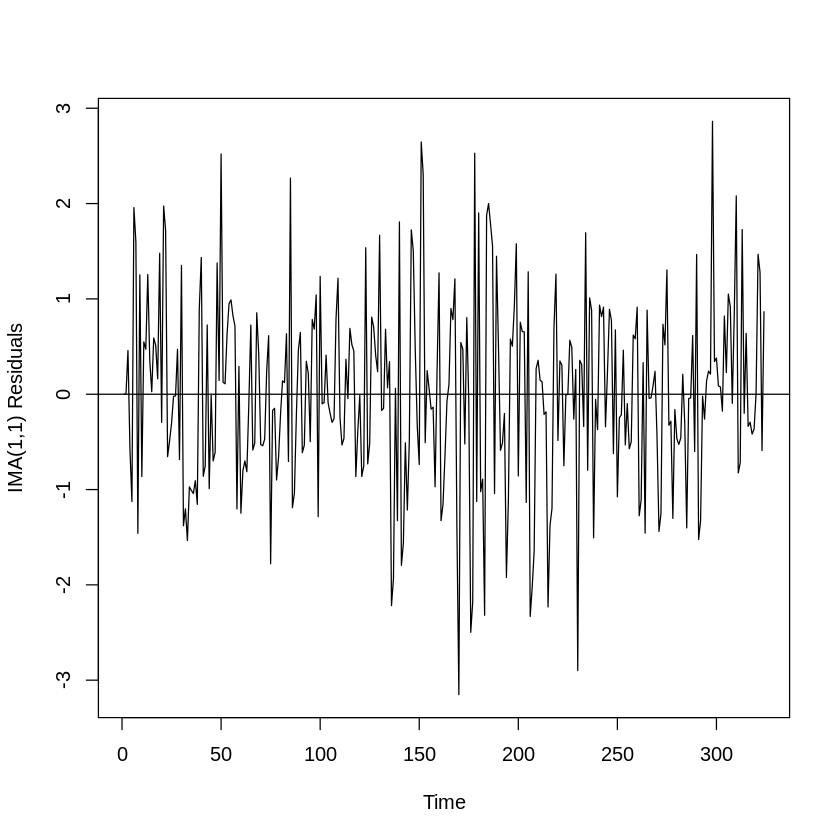

In [6]:
plot(res2,ylab='IMA(1,1) Residuals')
abline(h=0)

### The drift is not there in the IMA(1,1) model


	Box-Ljung test

data:  residuals from  model1
X-squared = 52.512, df = 11, p-value = 2.201e-07


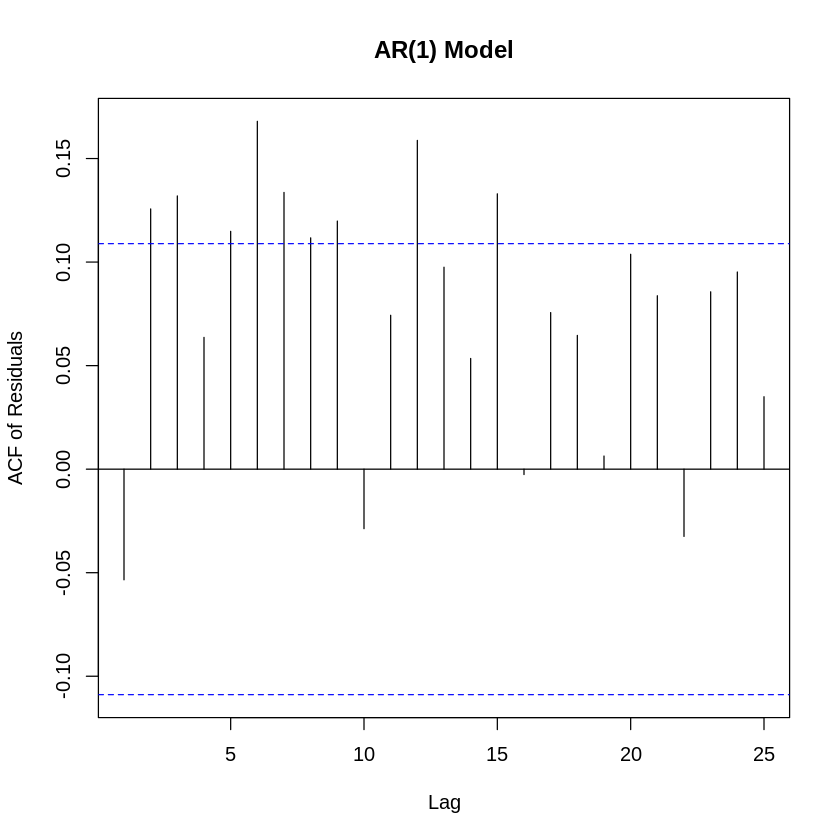

In [7]:
acf(residuals(model1), main='AR(1) Model',ylab='ACF of Residuals')
LB.test(model1)


	Box-Ljung test

data:  residuals from  model2
X-squared = 17.081, df = 11, p-value = 0.1055


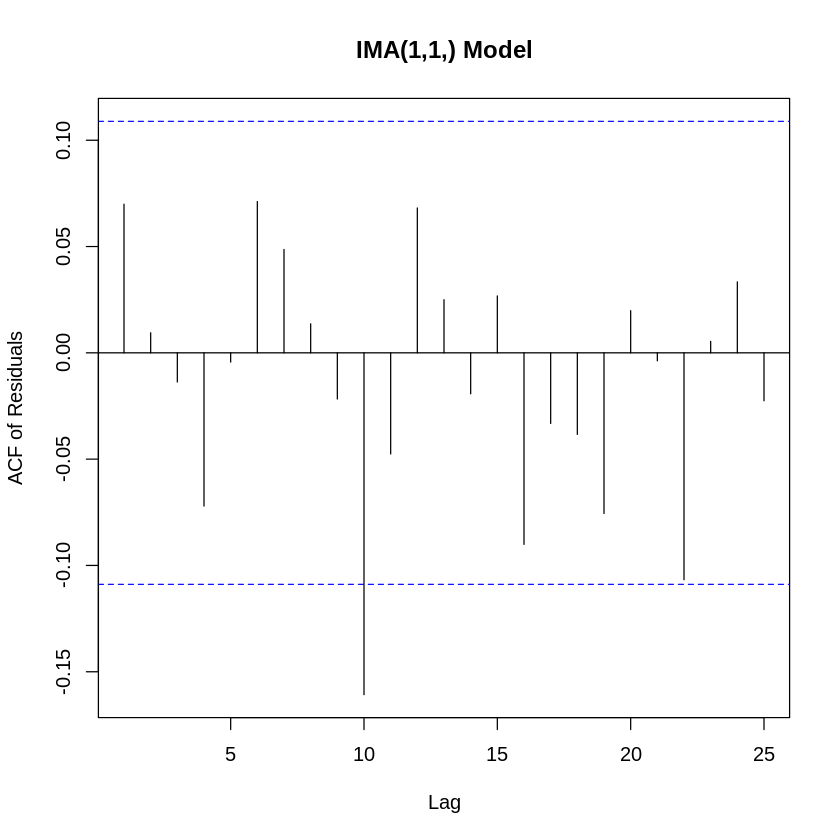

In [8]:
acf(residuals(model2), main='IMA(1,1,) Model',ylab='ACF of Residuals')
LB.test(model2)

### The residuals from the IMA(1,1) model are much less correlated with only one significant autocorrelation at lag 10.

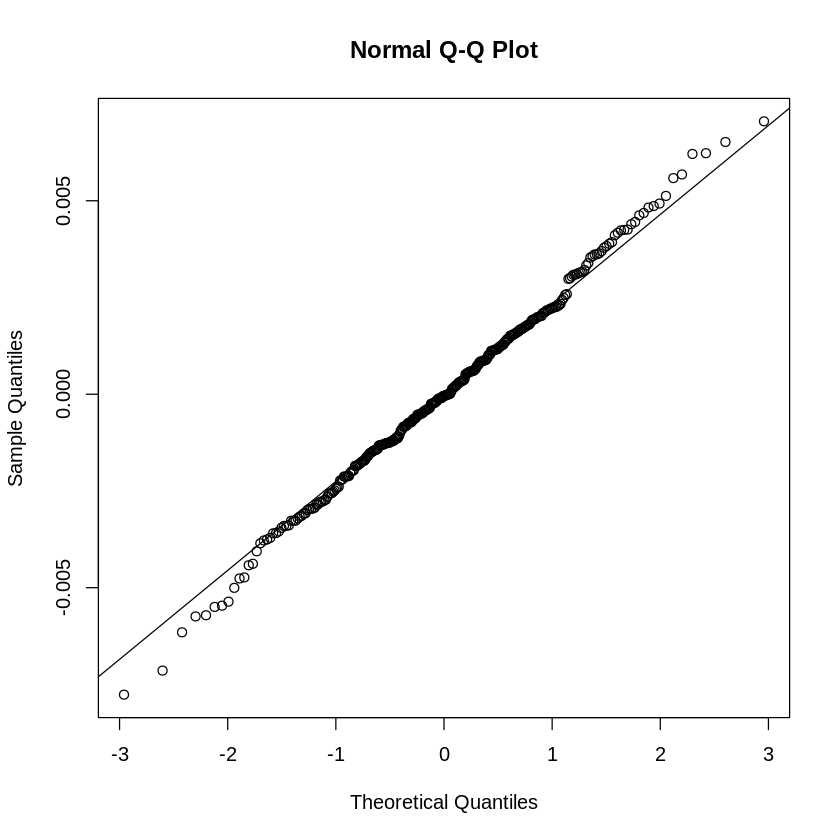

In [9]:
qqnorm(residuals(model2))
qqline(residuals(model2))

### The Q-Q plot looks good.

In [10]:
shapiro.test(residuals(model2))


	Shapiro-Wilk normality test

data:  residuals(model2)
W = 0.99689, p-value = 0.791


### Both the Q-Q plot and Shapiro Wilk test confirm that the residuals of IMA(1,1) model can be assumed to be normal

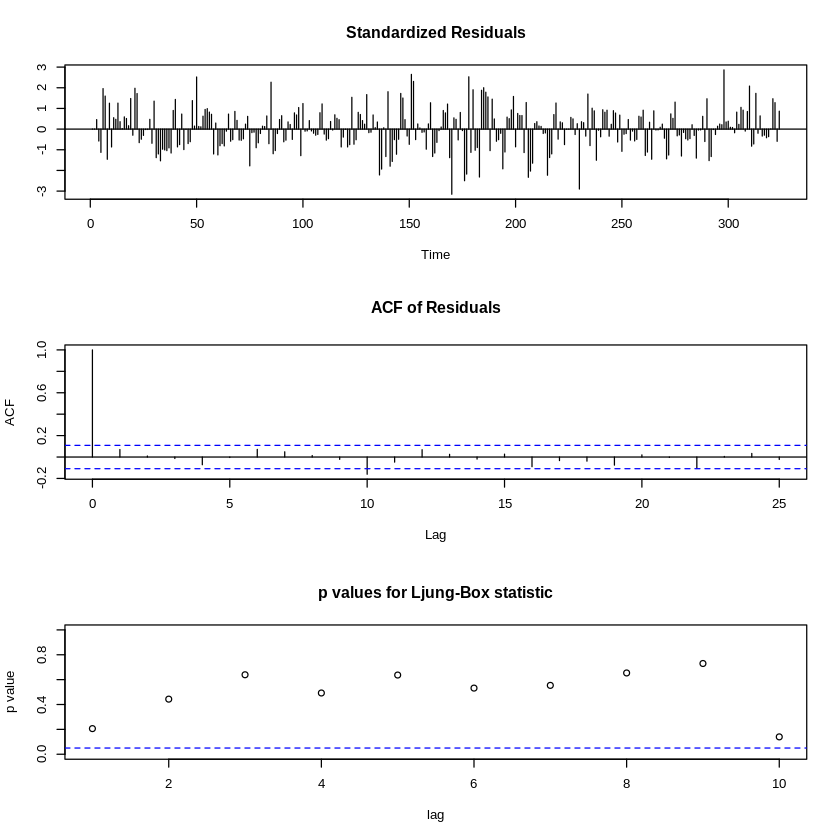

In [11]:
tsdiag(model2)

### IMA(1,1) is better than AR(1)

# Problem 3

## (a)

In [12]:
print(predict(model2,n.ahead=5)$pred)

Time Series:
Start = 325 
End = 329 
Frequency = 1 
[1] 0.001742672 0.001742672 0.001742672 0.001742672 0.001742672


Time Series:
Start = 325 
End = 329 
Frequency = 1 
[1] 0.006571344 0.006611183 0.006650699 0.006689898 0.006728790
Time Series:
Start = 325 
End = 329 
Frequency = 1 
[1] -0.003086000 -0.003125839 -0.003165355 -0.003204555 -0.003243446


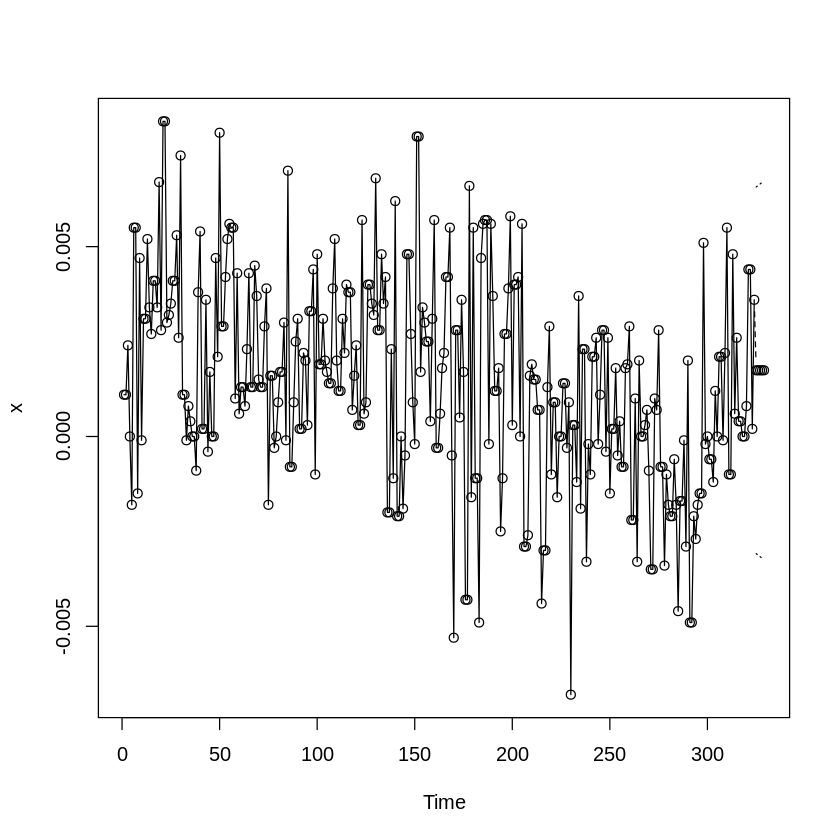

In [13]:
print(plot(model2,n.ahead=5)$upi)
print(plot(model2,n.ahead=5)$lpi)

## (b)

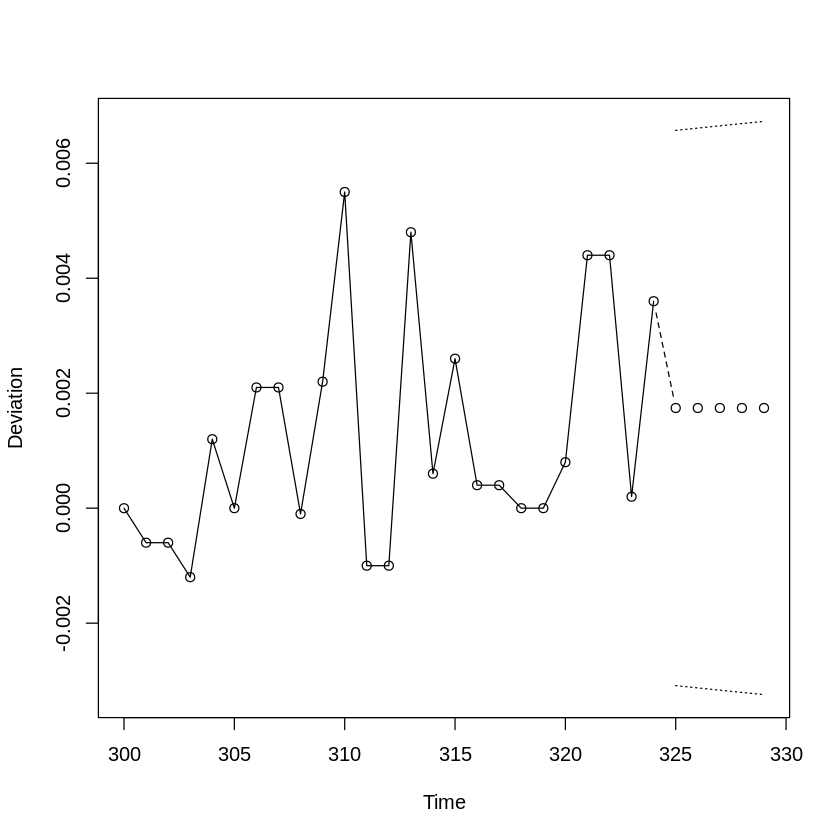

In [14]:
 plot(model2,n1=300,n.ahead=5,ylab='Deviation')

## (c)

In [15]:
model=arima(robot,order=c(1,0,1))
print(predict(model,n.ahead=5)$pred)

Time Series:
Start = 325 
End = 329 
Frequency = 1 
[1] 0.001901348 0.001879444 0.001858695 0.001839041 0.001820424


Time Series:
Start = 325 
End = 329 
Frequency = 1 
[1] 0.006681473 0.006706881 0.006728193 0.006745972 0.006760700
Time Series:
Start = 325 
End = 329 
Frequency = 1 
[1] -0.002878776 -0.002947994 -0.003010803 -0.003067889 -0.003119851


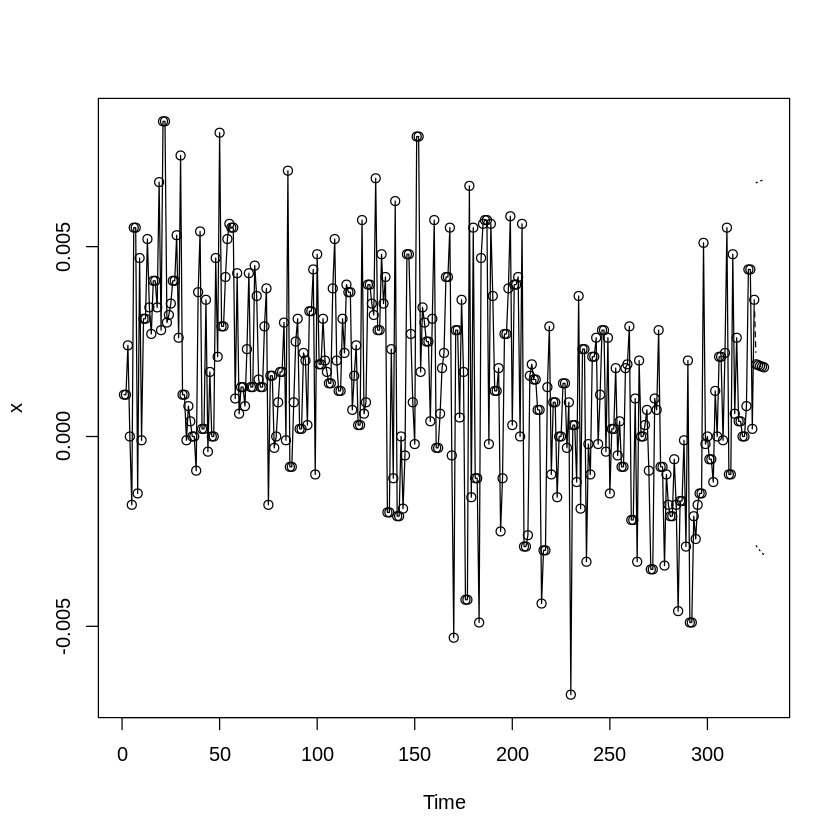

In [16]:
print(plot(model,n.ahead=5)$upi)
print(plot(model,n.ahead=5)$lpi)

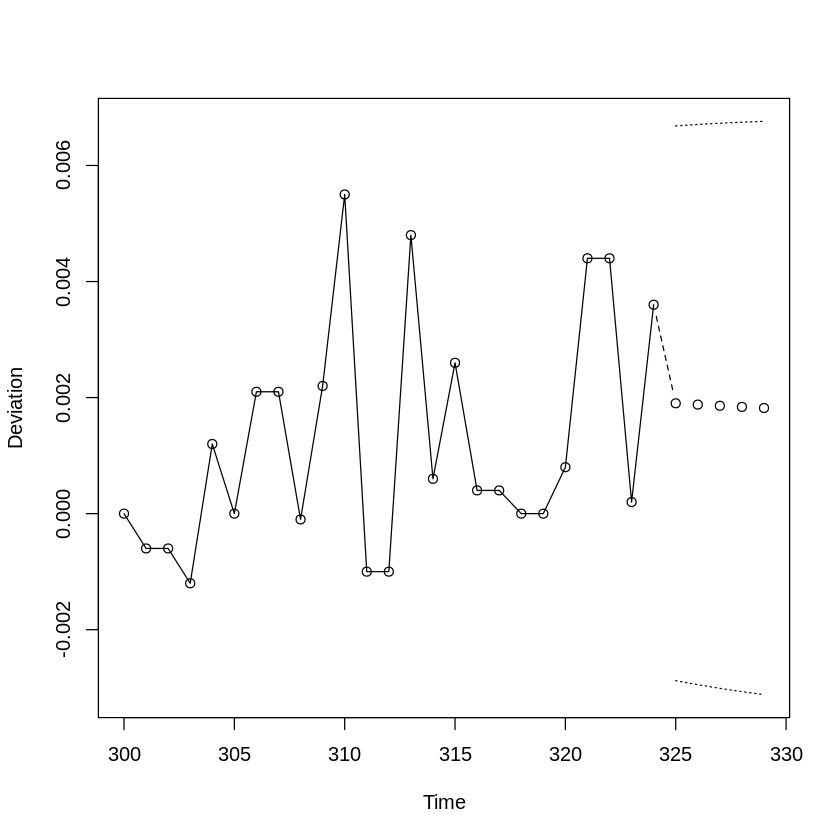

In [17]:
 plot(model,n1=300,n.ahead=5,ylab='Deviation')

### Both the models are very similar

# Problem 5

## (a)

In [18]:
data(airpass)

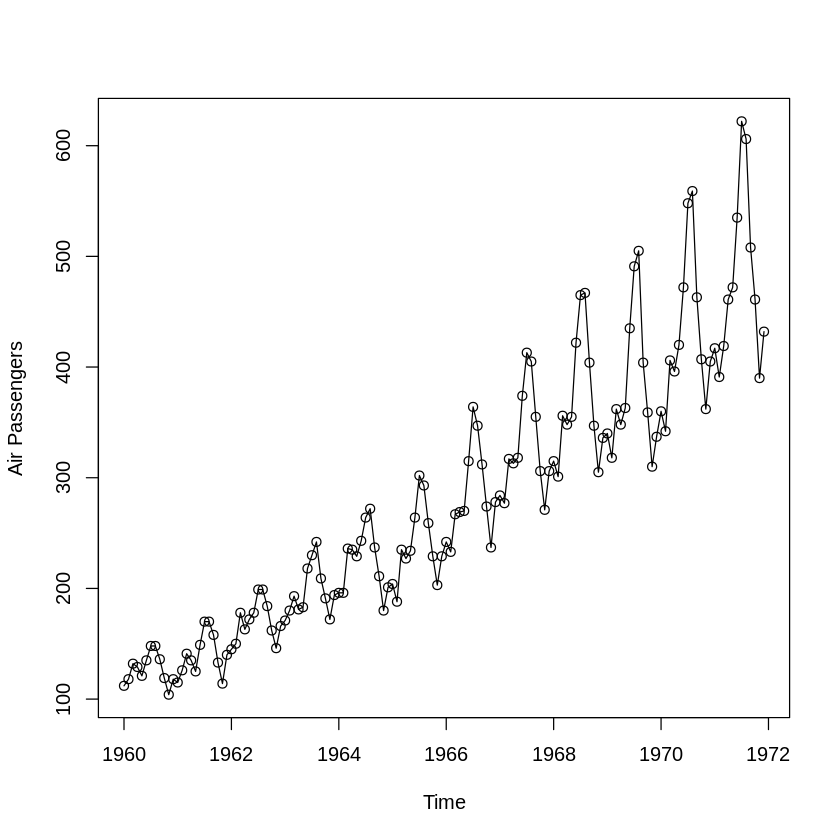

In [19]:
plot(airpass, type='o',ylab='Air Passengers')

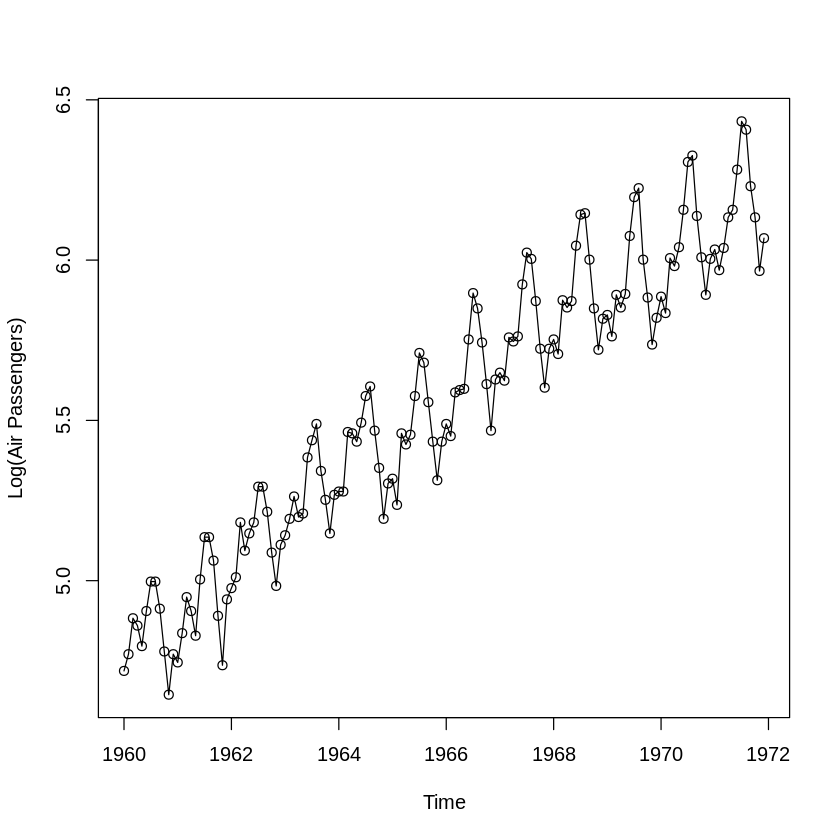

In [20]:
plot(log(airpass), type='o',ylab='Log(Air Passengers)')

### Log displays much more constant variation around the upward trend

## (b)

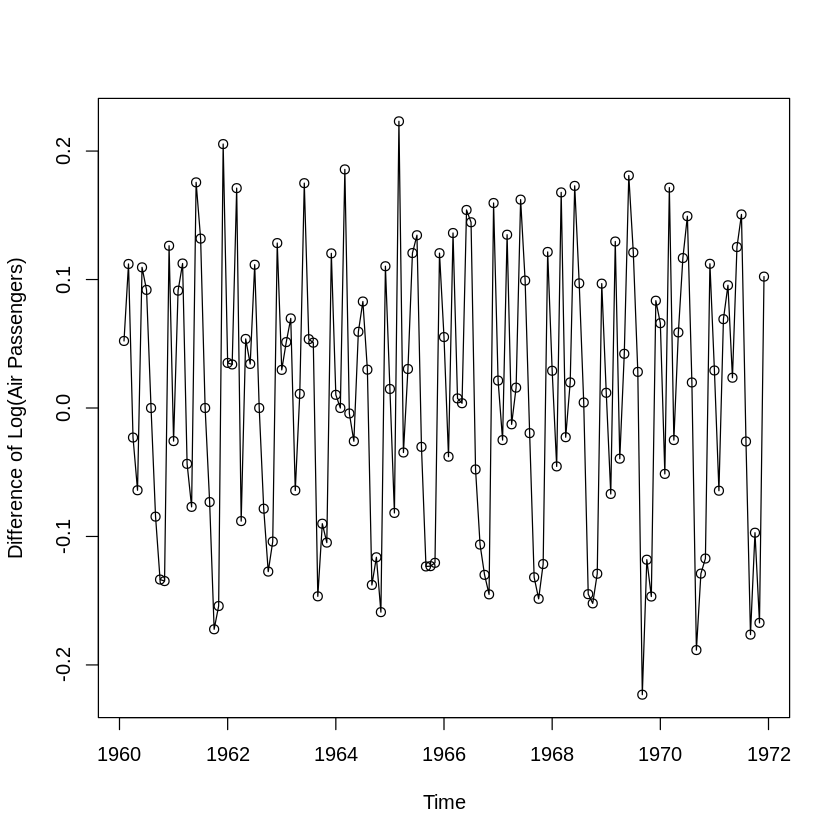

In [21]:
plot(diff(log(airpass)),type='o',ylab='Difference of Log(Air Passengers)')

### The series appears to be stationary but we can't be sure

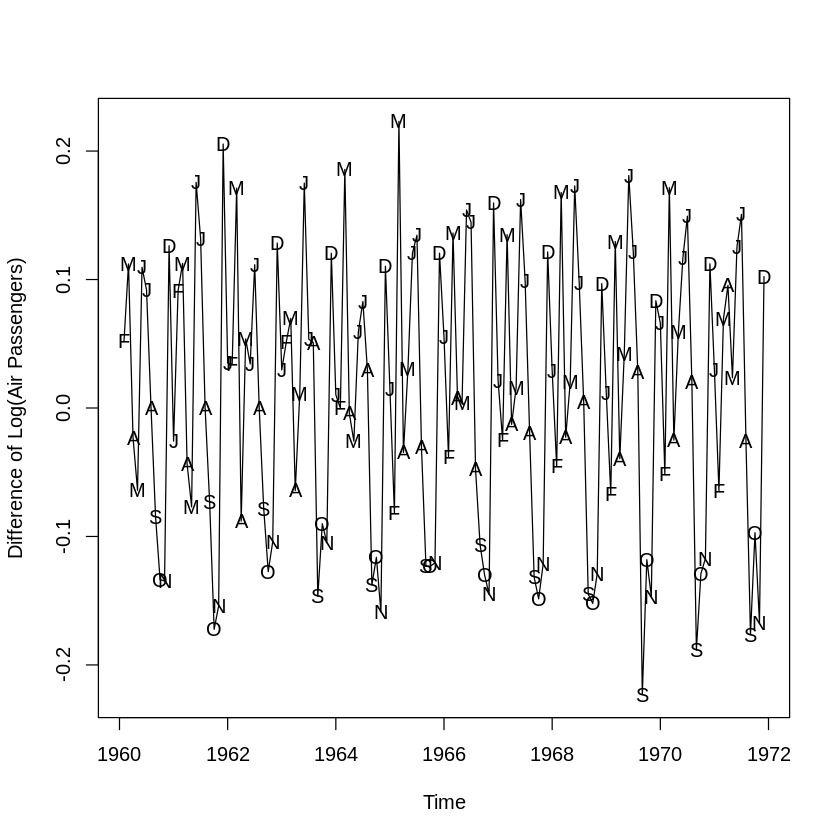

In [22]:
plot(diff(log(airpass)),type='l',ylab='Difference of Log(Air Passengers)')
points(diff(log(airpass)),x=time(diff(log(airpass))),pch=as.vector(season(diff(log(airpass)))))

### September, October and November have low passenger traffic and December has high passenger traffic

## (c)

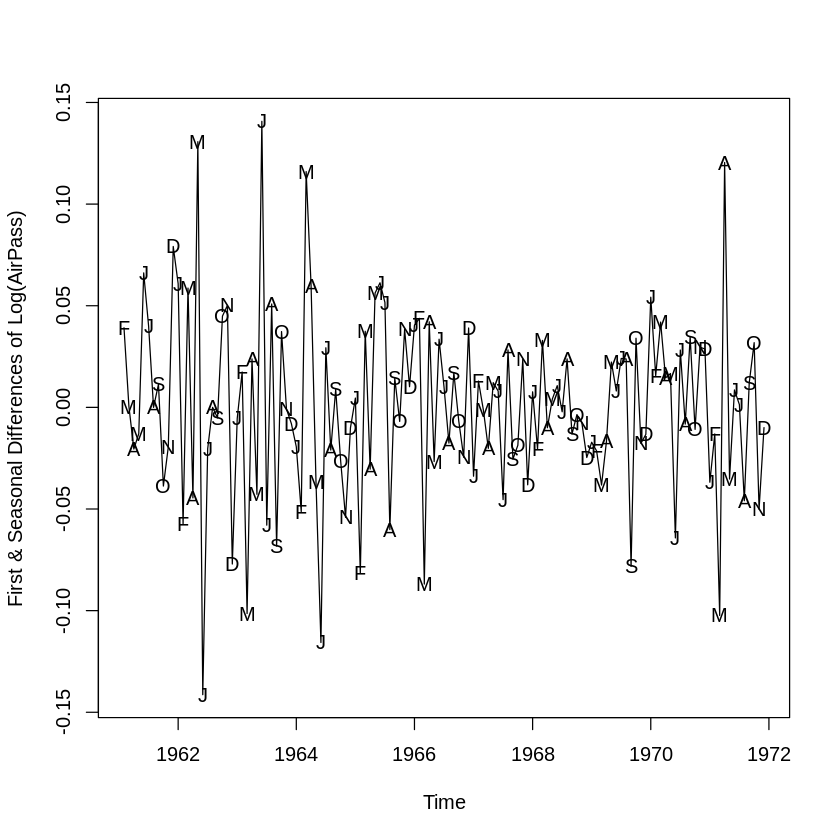

In [23]:
plot(diff(diff(log(airpass)),lag=12),type='l',
ylab='First & Seasonal Differences of Log(AirPass)')
points(diff(diff(log(airpass)),lag=12),x=time(diff(diff(log(airpass)),lag=12)),
pch=as.vector(season(diff(diff(log(airpass)),lag=12))))

### The seasonality is much less obvious now (for e.g. November & December both have high and low points)

## (d)

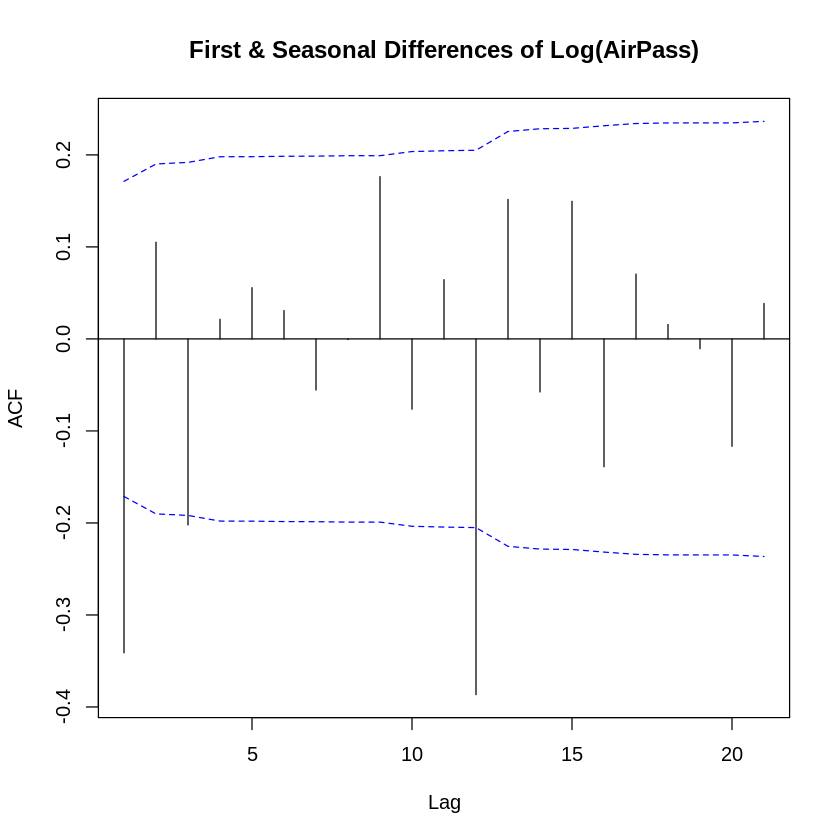

In [24]:
acf(as.vector(diff(diff(log(airpass)),lag=12)),ci.type='ma',main='First & Seasonal Differences of Log(AirPass)')

### The most prominent autocorrelations are at lags 1 and 12, there is also a significant autocorrelation at lag 3

## (e)

In [25]:
model=arima(log(airpass),order=c(0,1,1),seasonal=list(order=c(0,1,1),period=12))
model


Call:
arima(x = log(airpass), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 
    1), period = 12))

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001348:  log likelihood = 244.7,  aic = -485.4

### Both nonseasonal and seasonal models have significant MA parameters

## (f)

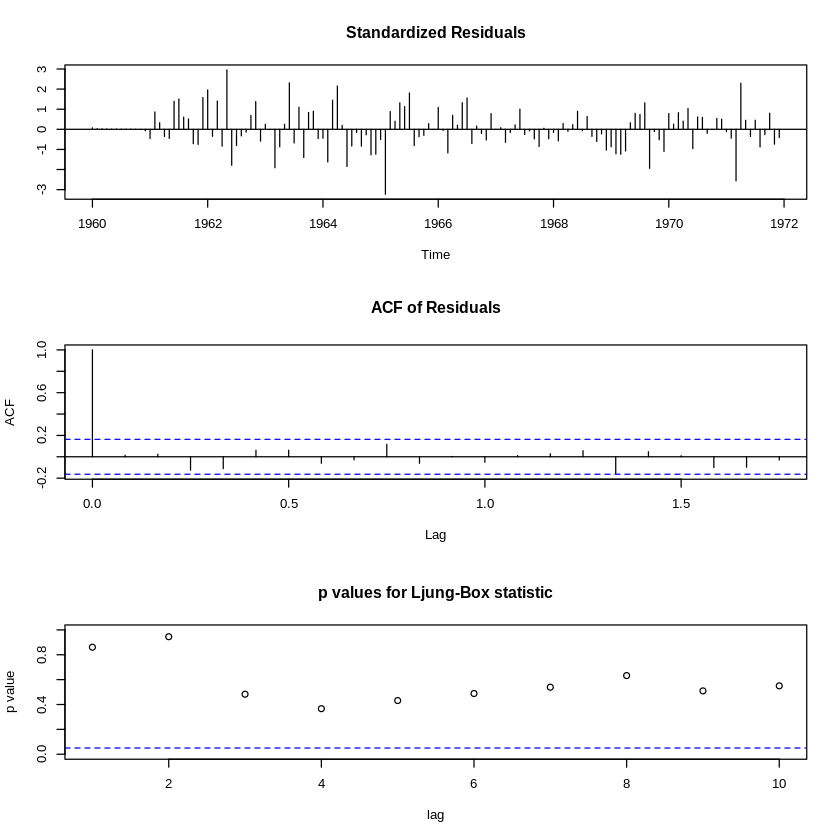

In [26]:
tsdiag(model)

### None of these plots show any significant problem with the model

In [27]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.98637, p-value = 0.1674


 ### Shapiro Wilk test confirms that the residuals of airline model can be assumed to be normal

## (g)

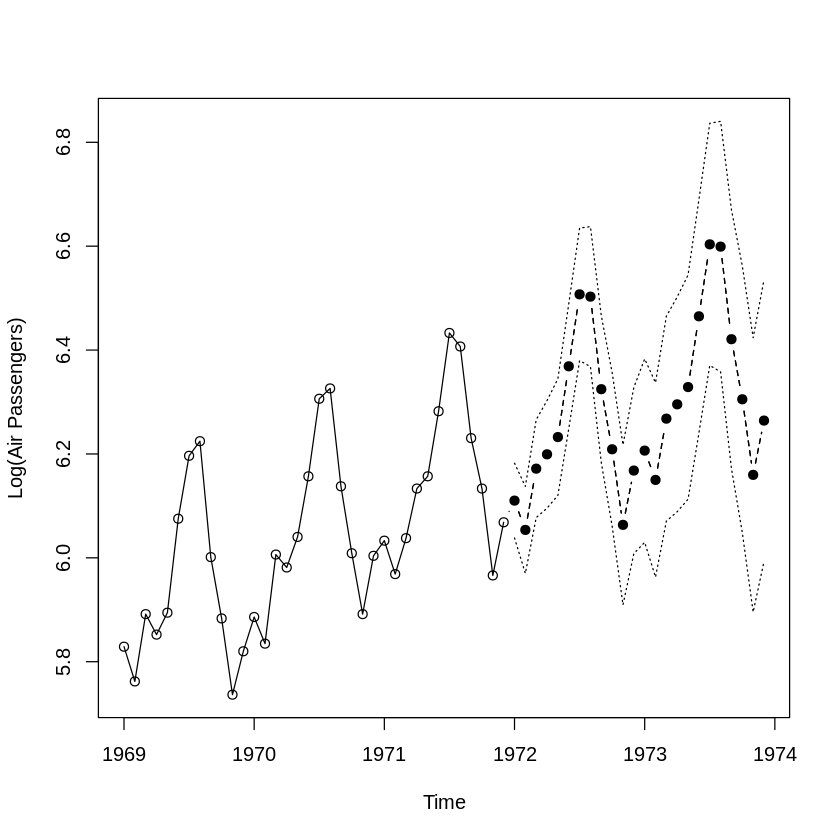

In [28]:
plot(model,n1=c(1969,1),n.ahead=24,pch=19,ylab='Log(Air Passengers)')

### The forecast follows the upward and seasonal trend of the series. We can also plot the limits in their original form to get a better idea of the uncertainty.

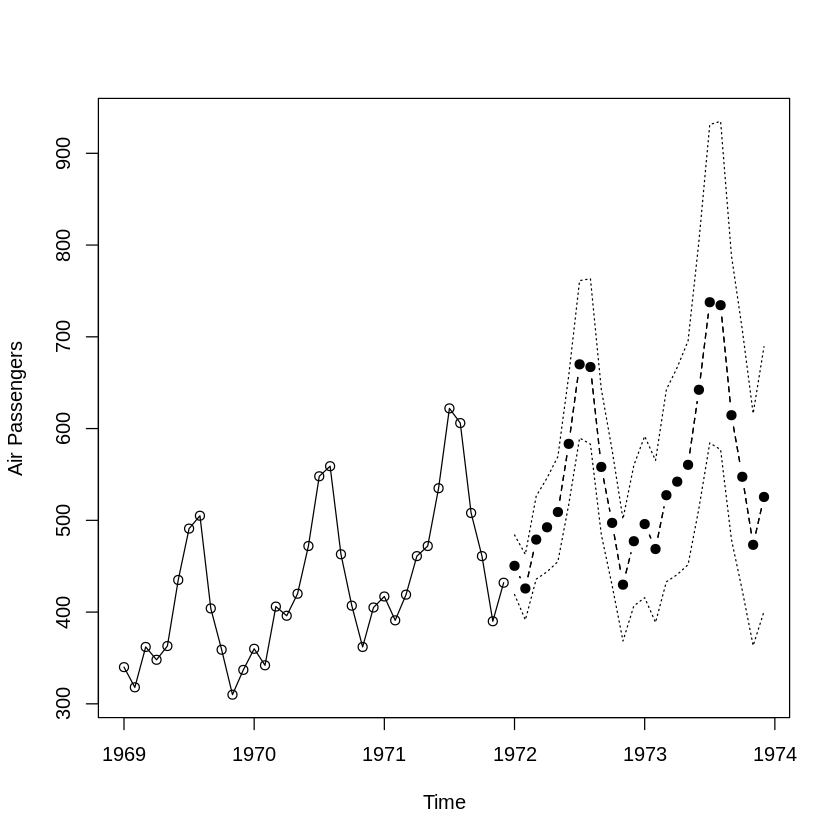

In [29]:
plot(model,n1=c(1969,1),n.ahead=24,pch=19,ylab='Air Passengers',transform=exp)